In [1]:
!pip install bing-image-downloader

In [2]:
import bing_image_downloader

In [3]:
!mkdir images

In [4]:
from bing_image_downloader import downloader
downloader.download('Cats', limit=21,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 21 Images on Page 1.


[%] Downloading Image #1 from https://d.newsweek.com/en/full/1583795/coronavirus-us.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://specials-images.forbesimg.com/imageserve/465052997/960x0.jpg?fit=scale
[%] File Downloaded !

[%] Downloading Image #3 from https://s30886.pcdn.co/wp-content/uploads/2019/03/cats.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cdn.themindcircle.com/wp-content/uploads/2016/02/cats-Fur-Markings-4.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://d.ibtimes.co.uk/en/full/1457779/cats-dont-need-owners.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ytimg.com/vi/XLFqNc0_Dp8/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.rd.com/wp-content/uploads/2020/03/GettyImages-1128004359.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://www.catster.com/wp-content/uploads/2015/08/catster-cats-with-boot

In [5]:
from bing_image_downloader import downloader
downloader.download('Dogs', limit=25,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 25 Images on Page 1.


[%] Downloading Image #1 from https://www.guidedogs.org/wp-content/uploads/2018/01/Mobile.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://abbeyrosefoundation.org/wp-content/uploads/2013/02/Golden-Retriever.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://bigfluffydogs.com/wp-content/uploads/2018/03/Owen-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.luckygoldenretriever.com/wp-content/uploads/2016/12/Cleaning_Your_Dogs_Ears.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn1.medicalnewstoday.com/content/images/hero/326/326253/326253_1100.jpg
[!] Issue getting: https://cdn1.medicalnewstoday.com/content/images/hero/326/326253/326253_1100.jpg
[!] Error:: <urlopen error [Errno -2] Name or service not known>
[%] Downloading Image #5 from https://whatson.ae/dubai/wp-content/uploads/2017/01/dogs-dubai.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http

In [6]:
import numpy as np
from keras.preprocessing import image
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
print("Files imported successfully")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

Files imported successfully


In [7]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            train_img.append(img_pred)

    X = np.array(train_img)

    return X

X = []
X = load_image_files("/content/images")

y0 = np.zeros(21)
#2000 is the number of Cats in X
y1 = np.ones(25)
#2134 is the number of Dogs in X
y = []
y = np.concatenate((y0,y1), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

from builtins import range
from builtins import object

num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

X_train: (36, 50, 50, 1)
X_test: (5, 50, 50, 1)
X_val: (5, 50, 50, 1)
y_train: (36,)
y_test: (5,)
y_val: (5,)
X_train: (36, 2500)
X_test: (5, 2500)
X_val: (5, 2500)
y_train: (36,)
y_test: (5,)
y_val: (5,)


In [8]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def predict_label(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances_no_loops(X)

        return self.predict_labels(dists, k=k)

    def compute_distances_no_loops(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt((X ** 2).sum(axis=1, keepdims=1) + (self.X_train ** 2).sum(axis=1) - 2 * X.dot(self.X_train.T))

        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            closest_y = closest_y.astype(int)
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [16]:
print("Val Accuracy for k=2")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_val)
y_val_pred = classifier.predict_labels(dists, k=2)
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_val, accuracy))

Val Accuracy for k=2
Got 3 / 5 correct => accuracy: 0.600000


Using SKLEARN


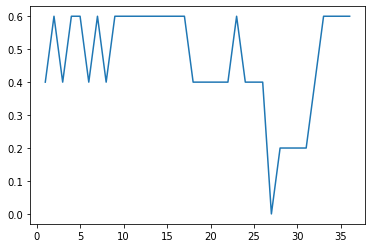

max acc at k=2 acc of 0.6


In [10]:
print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 37):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    liy.append(neigh.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [30]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
print("Test Accuracy: "+str(neigh.score(X_test, y_test)))

print("Using our own k-NN")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_test)
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('With k = 1 Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Test Accuracy: 0.6
Using our own k-NN
With k = 1 Got 3 / 5 correct => accuracy: 0.600000


In [38]:
print("Predicting custom image: 1")
img = cv.imread("/content/images/cat1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
# Test implementation:
dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Cat", "Dog"]
y_test_pred = classifier2.predict_labels(dists2, k=1)
print(labels[int(y_test_pred)])

Predicting custom image: 1
Cat


In [37]:
print("Predicting custom image: 2")
img = cv.imread("/content/images/cat2.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
# Test implementation:
dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Cat", "Dog"]
y_test_pred = classifier2.predict_labels(dists2, k=1)
print(labels[int(y_test_pred)])

Predicting custom image: 2
Cat


In [36]:
print("Predicting custom image: 3")
img = cv.imread("/content/images/dog1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
# Test your implementation:
dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Cat", "Dog"]
y_test_pred = classifier2.predict_labels(dists2, k=1)
print(labels[int(y_test_pred)])

Predicting custom image: 3
Cat


In [35]:
print("Predicting custom image: 4")
img = cv.imread("/content/images/dog2.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
# Test your implementation:
dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Cat", "Dog"]
y_test_pred = classifier2.predict_labels(dists2, k=1)
print(labels[int(y_test_pred)])

Predicting custom image: 4
Cat


In [28]:
print("Predicting custom image: 5")
img = cv.imread("/content/images/dog3.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
# Test your implementation:
dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Cat", "Dog"]
y_test_pred = classifier2.predict_labels(dists2, k=1)
print(labels[int(y_test_pred)])

Predicting custom image: 5
Dog


In [ ]:
# I got 3 correct predictions out of 5